In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from src import track_reconstruction as tr
from src import TrackGenerator

## Testing Suman's code

In [2]:
q = -1.0
radius = (33.25, 50.5, 88.5, 122.5)  # radius of pixel layer

initial_guess = {"x": 2, "y": 1, "z": 0, "px": 30, "py": 40, "pz": 60, "charge": q}
track = TrackGenerator.TrackGenerator(**initial_guess)

hit_coordinates = track.generate_track_with_all_hits()

X, Y, Z, phi, t = track.evolve_track(time_steps=1000)

hits = track.find_layer_intersections()
hits_layer1 = hits[radius[0]]
hits_layer2 = hits[radius[1]]
hits_layer3 = hits[radius[2]]
hits_layer4 = hits[radius[3]]


print("Layer 1 Hits:", hits_layer1)
print("Layer 2 Hits:", hits_layer2)
print("Layer 3 Hits:", hits_layer3)
print("Layer 4 Hits:", hits_layer4)




Layer 1 Hits: (np.float64(-22.741508113381812), np.float64(-24.256555761727547), np.float64(-7.894214353368604))
Layer 2 Hits: (np.float64(-37.212922095389395), np.float64(-34.138661197197486), np.float64(-11.79834850637275))
Layer 3 Hits: (np.float64(-73.68594825338614), np.float64(-49.01634744957389), np.float64(-20.59963779225072))
Layer 4 Hits: (np.float64(-110.52897284511363), np.float64(-52.81619028780778), np.float64(-28.871911437826135))


Hits: [[ -22.74150811  -24.25655576   -7.89421435]
 [ -37.2129221   -34.1386612   -11.79834851]
 [ -73.68594825  -49.01634745  -20.59963779]
 [-110.52897285  -52.81619029  -28.87191144]]
[-22.74150811 -22.52449961 -22.30778855 ...  32.58938931  32.54340292
  32.4968988 ] [-24.25655576 -24.10804858 -23.95910767 ... 107.18565275 107.44455877
 107.7033723 ] [ -7.89421435  -7.83562921  -7.77704407 ... 577.8400309  577.89861604
 577.95720118]
[-22.74150811 -22.52449961 -22.30778855 ...  32.58938931  32.54340292
  32.4968988 ]
[-24.25655576 -24.10804858 -23.95910767 ... 107.18565275 107.44455877
 107.7033723 ]
[ -7.89421435  -7.83562921  -7.77704407 ... 577.8400309  577.89861604
 577.95720118]


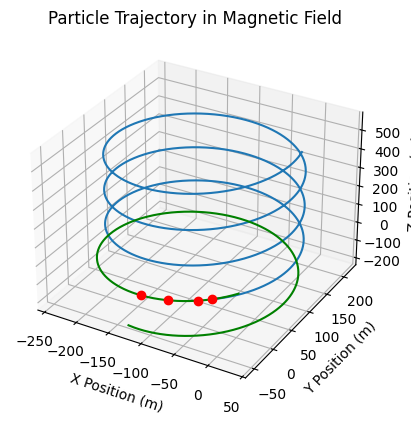

In [3]:

hits_final = np.array([hits_layer1, hits_layer2, hits_layer3, hits_layer4]) 
print("Hits:", hits_final)

# Simulate trajectory
x = hits_final[0] # initial position
p = tr.estimate_initial_momentum(hits_final, B=2.0, charge=q)  # initial momentum (GeV/c)

trajectory = tr.recreate_track(hits_final, B=2.0, q=q)



print(np.array(trajectory)[:, 0], np.array(trajectory)[:, 1],np.array(trajectory)[:, 2])
x = np.array(trajectory)[:, 0]
y = np.array(trajectory)[:, 1]
z = np.array(trajectory)[:, 2]
print(x)
print(y)
print(z)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.set_xlabel('X Position (m)')
ax.set_ylabel('Y Position (m)')
ax.set_zlabel('Z Position (m)')
ax.set_title('Particle Trajectory in Magnetic Field')

ax.plot(X, Y, Z, label='Evolved Track', color='green')

ax.plot(hits_layer1[0],hits_layer1[1],hits_layer1[2], 'ro', label='Layer 1 Hits')
ax.plot(hits_layer2[0],hits_layer2[1],hits_layer2[2], 'ro', label='Layer 1 Hits')
ax.plot(hits_layer3[0],hits_layer3[1],hits_layer3[2], 'ro', label='Layer 1 Hits')
ax.plot(hits_layer4[0],hits_layer4[1],hits_layer4[2], 'ro', label='Layer 1 Hits')

plt.show()
    


Text(0.5, 1.0, 'Particle Trajectory in Magnetic Field')

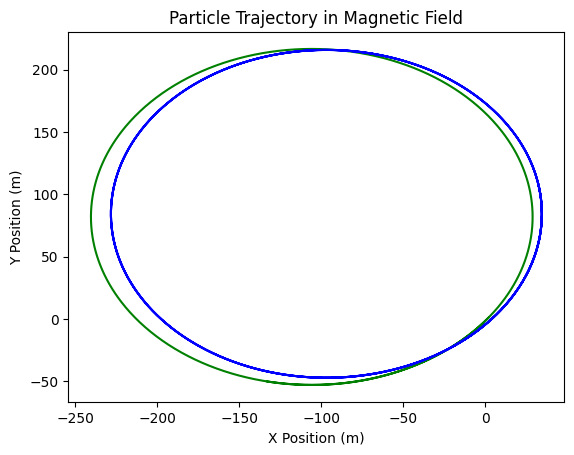

In [4]:
plt.plot(X, Y, label='Evolved Track', color='green')
plt.plot(x, y, label='Reconstructed Track', color='blue')

plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.title('Particle Trajectory in Magnetic Field')


In [ ]:
# XY Projection Plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot truth track (evolved track)
ax.plot(X, Y, label='Truth Track', color='green', linewidth=2)

# Plot reconstructed track
ax.plot(x, y, label='Reconstructed Track', color='blue', linewidth=2, linestyle='--')

# Plot truth hits from each layer
ax.scatter(hits_layer1[0], hits_layer1[1], color='red', s=50, label='Layer 1 Hits', marker='o')
ax.scatter(hits_layer2[0], hits_layer2[1], color='orange', s=50, label='Layer 2 Hits', marker='s')
ax.scatter(hits_layer3[0], hits_layer3[1], color='purple', s=50, label='Layer 3 Hits', marker='^')
ax.scatter(hits_layer4[0], hits_layer4[1], color='brown', s=50, label='Layer 4 Hits', marker='D')

# Add circles representing the detector layers
theta = np.linspace(0, 2*np.pi, 100)
for i, r in enumerate(radius):
    circle_x = r * np.cos(theta)
    circle_y = r * np.sin(theta)
    ax.plot(circle_x, circle_y, 'k--', alpha=0.3, linewidth=1)
    ax.text(r*0.7, r*0.7, f'Layer {i+1}\nR={r}m', fontsize=8, alpha=0.7)

ax.set_xlabel('X Position (m)')
ax.set_ylabel('Y Position (m)')
ax.set_title('XY Projection: Truth vs Reconstructed Track with Detector Hits')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')
plt.tight_layout()
plt.show()